## Explorign Mass Spectroscopy Deconvolution Data

In [1]:
import os
import numpy as np
import pandas as pd
import re

from NUDT7_ratios import read_grouped_csv
from NUDT7_ratios import remove_dataset_by_filename_content
from NUDT7_ratios import check_signal_to_noise
from NUDT7_ratios import ratios_from_filenames
from NUDT7_ratios import get_ratios_of_expected_peaks
from NUDT7_ratios import pre_crystal_plot
from NUDT7_ratios import post_crystal_plot
from NUDT7_ratios import string_contains
from NUDT7_ratios import post_crystal_calibrated_plot
from NUDT7_ratios import peak_height_outside_of_interest

from io import StringIO
from scipy.signal import find_peaks

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

In [2]:

data_dir = "/dls/science/groups/i04-1/elliot-dev/mass_spec_ratio/NUDT7_Data"
#data_dir = "/home/nelse003/PycharmProjects/mass_spec_ratio/NUDT7_Data"

df_dict = {}
for csv in os.listdir(data_dir):
    csv = os.path.join(data_dir, csv)
    df_dict.update(read_grouped_csv(csv))

keys_to_remove = []
peak_ratio  = []
for key, df in df_dict.items():
    if "blank" in key:
        keys_to_remove.append(key)

for key in set(keys_to_remove):
    del df_dict[key]

keys_to_remove = []
for key, df in df_dict.items():
    try:
        peak_ratio.append(peak_height_outside_of_interest(df))
    except ValueError:
        keys_to_remove.append(key)
    

/dls/science/groups/i04-1/elliot-dev/mass_spec_ratio/NUDT7_ratios.py:44: FutureWarning: split() requires a non-empty pattern match.
  split_data = header_re.split(data)


In [3]:
print(df_dict.keys())

dict_keys(['190225 : "+ESI Scan (rt: 7.216-7.993 min, 48 scans) Frag=250.0V NUDT7A_p026_CI074433_H1a_multiple_xtal.d  Deconvoluted (Isotope Width=0.0)"\n', '190225 : "+ESI Scan (rt: 7.208-7.986 min, 48 scans) Frag=250.0V NUDT7A_p026_CI074433_H1a_single_xtal.d  Deconvoluted (Isotope Width=0.0)"\n', '190225 : "+ESI Scan (rt: 7.217-7.995 min, 48 scans) Frag=250.0V NUDT7A_p026_CI074433_H1c_multiple_xtal.d  Deconvoluted (Isotope Width=0.0)"\n', '190225 : "+ESI Scan (rt: 7.212-7.989 min, 48 scans) Frag=250.0V NUDT7A_p026_CI074433_H1c_single_xtal.d  Deconvoluted (Isotope Width=0.0)"\n', '190225 : "+ESI Scan (rt: 7.215-7.992 min, 48 scans) Frag=250.0V NUDT7A_p026_CI074433_H1d_multiple_xtal.d  Deconvoluted (Isotope Width=0.0)"\n', '190227 : "+ESI Scan (rt: 7.204-7.998 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074437_D11c.d  Deconvoluted (Isotope Width=0.0)"\n', '190227 : "+ESI Scan (rt: 7.213-7.990 min, 48 scans) Frag=250.0V NUDT7A_p026_CI074437_D7c.d  Deconvoluted (Isotope Width=0.0)"\n', '1902

In [4]:
sample_key = '190301 : "+ESI Scan (rt: 7.203-7.997 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074435_F5a.d  Deconvoluted (Isotope Width=0.0)"\n'

print(df_dict[sample_key])

       Point  X(Daltons)     Y(Counts)
0          0     15000.0  5.641444e-07
1          1     15001.0  3.845424e-05
2          2     15002.0  1.062780e-04
3          3     15003.0  2.344615e-04
4          4     15004.0  4.305320e-04
5          5     15005.0  6.650165e-04
6          6     15006.0  8.809295e-04
7          7     15007.0  9.815170e-04
8          8     15008.0  8.738276e-04
9          9     15009.0  6.013412e-04
10        10     15010.0  3.277151e-04
11        11     15011.0  1.547168e-04
12        12     15012.0  6.985284e-05
13        13     15013.0  3.141039e-05
14        14     15014.0  1.449706e-05
15        15     15015.0  8.092951e-06
16        16     15016.0  8.110250e-06
17        17     15017.0  1.611625e-05
18        18     15018.0  4.261735e-05
19        19     15019.0  1.139812e-04
20        20     15020.0  2.716987e-04
21        21     15021.0  5.335366e-04
22        22     15022.0  8.135565e-04
23        23     15023.0  9.408923e-04
24        24     15024.0 

In [5]:
sample_df = df_dict[sample_key]

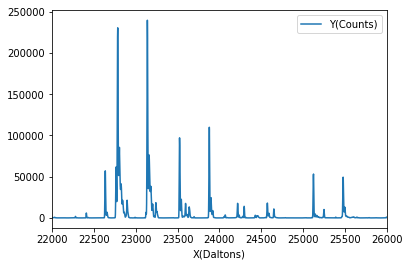

In [6]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',xlim=(22000,26000))

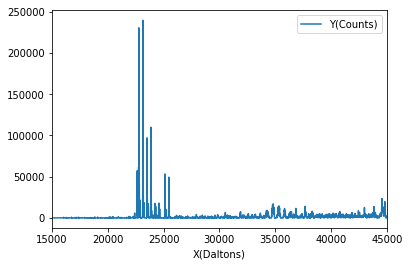

In [7]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line')

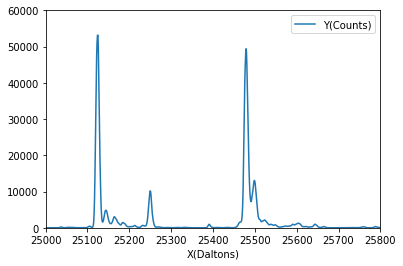

In [8]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',xlim=(25000,25800),ylim=(0,60000))

In [9]:
unlabelled_peak_df = sample_df[(sample_df['X(Daltons)'] >= 25100) & (sample_df['X(Daltons)'] <= 25300)]

In [10]:
unlabelled_peak_df['Y(Counts)'].sum()

774803.1530342102

In [11]:
labelled_peak_df = sample_df[(sample_df['X(Daltons)'] >= 25454) & (sample_df['X(Daltons)'] <= 25654)]

In [12]:
labelled_peak_df['Y(Counts)'].sum()

846106.7826080322

In [13]:
labelled_peak_df['Y(Counts)'].sum()/unlabelled_peak_df['Y(Counts)'].sum()

1.092028058087515

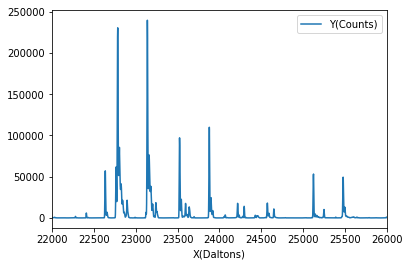

In [14]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(22000,26000))

Expected peaks are to seperated by 354. Lokking for pairs

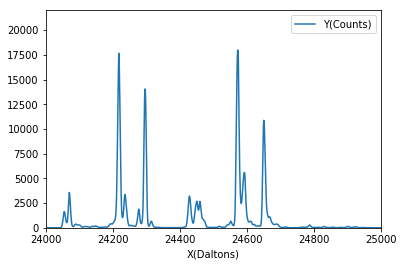

In [15]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(24000,25000),ylim=(0,22000))

In [16]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 24200) & (sample_df['X(Daltons)'] <= 24400)]

In [17]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point          9218.000000
X(Daltons)    24218.000000
Y(Counts)     17657.451172
Name: 9218, dtype: float64

Therefore the maximum should be at 24,572 for that to be a peak

In [18]:
test_label_df = sample_df[(sample_df['X(Daltons)'] >= 24500) & (sample_df['X(Daltons)'] <= 24700)]

In [19]:
test_label_df.loc[test_label_df['Y(Counts)'].idxmax()]

Point          9574.000000
X(Daltons)    24574.000000
Y(Counts)     17981.341797
Name: 9574, dtype: float64

In [20]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 24000) & (sample_df['X(Daltons)'] <= 24100)]

In [21]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point          9070.000000
X(Daltons)    24070.000000
Y(Counts)      3575.023193
Name: 9070, dtype: float64

In [22]:
test_label_df = sample_df[(sample_df['X(Daltons)'] >= 24400) & (sample_df['X(Daltons)'] <= 24500)]

In [23]:
test_label_df.loc[test_label_df['Y(Counts)'].idxmax()]

Point          9429.000000
X(Daltons)    24429.000000
Y(Counts)      3206.845947
Name: 9429, dtype: float64

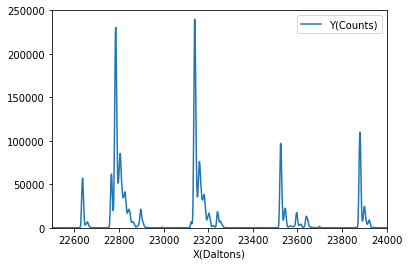

In [24]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(22500,24000),ylim=(0,250000))

Looks like two sets of peaks

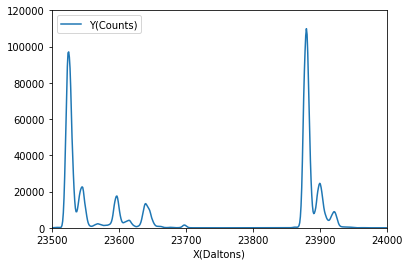

In [25]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(23500,24000),ylim=(0,120000))

In [26]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 23500) & (sample_df['X(Daltons)'] <= 23700)]

In [27]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point          8525.000000
X(Daltons)    23525.000000
Y(Counts)     97079.601562
Name: 8525, dtype: float64

In [28]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 23850) & (sample_df['X(Daltons)'] <= 23950)]

In [29]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point           8880.000000
X(Daltons)     23880.000000
Y(Counts)     109901.679688
Name: 8880, dtype: float64

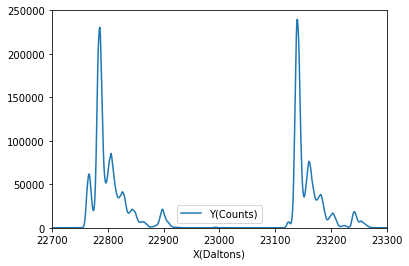

In [30]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(22700,23300),ylim=(0,250000))

In [31]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 22750) & (sample_df['X(Daltons)'] <= 22900)]

In [32]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point           7786.000000
X(Daltons)     22786.000000
Y(Counts)     230468.328125
Name: 7786, dtype: float64

In [33]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 23100) & (sample_df['X(Daltons)'] <= 23300)]

In [34]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point           8140.000000
X(Daltons)     23140.000000
Y(Counts)     239670.484375
Name: 8140, dtype: float64

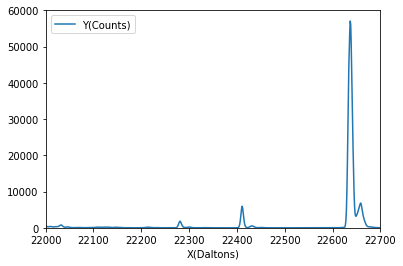

In [35]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(22000,22700),ylim=(0,60000))

In [36]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 22600) & (sample_df['X(Daltons)'] <= 22700)]

In [37]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point          7637.00000
X(Daltons)    22637.00000
Y(Counts)     57046.96875
Name: 7637, dtype: float64

Therefore we have:

| Unlabelled | Labelled |
| --- | --- |
| 25125 | 25479 |
| 24218 | 24574 |
| 23525 | 23879 |
| 22786 | 23140 | 

Peak at 22637 doesnt match next peak down. Could be two weak pairs? Explain 8/9 strongest peaks. Need to look at the continuty of ratios between the sets, and the difference using max peak, and area within defined region from

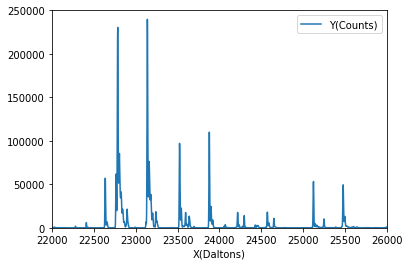

In [38]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',ylim=(0,250000),xlim=(22000,26000))

In [39]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 21000) & (sample_df['X(Daltons)'] <= 26000)]


In [40]:
x = sample_df['Y(Counts)']

In [41]:
test_df

,Point,X(Daltons),Y(Counts)
6000,6000,21000.0,15.237430
6001,6001,21001.0,11.853443
6002,6002,21002.0,9.282764
6003,6003,21003.0,7.878075
6004,6004,21004.0,7.554580
6005,6005,21005.0,8.089995
6006,6006,21006.0,9.665759
6007,6007,21007.0,12.994101
6008,6008,21008.0,18.986790
6009,6009,21009.0,28.647753


In [42]:
peaks, _ = find_peaks(x, height=0)

In [43]:
peaks = peaks + 6000

In [44]:
len(peaks)

1781

/dls/science/groups/i04-1/elliot-dev/envs/parse_xchemdb/lib/python3.6/site-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


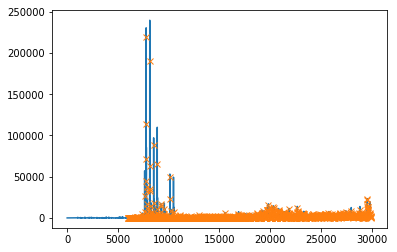

In [45]:
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

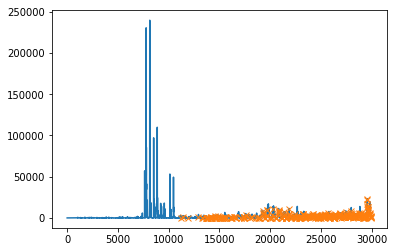

684

In [46]:
peaks, _ = find_peaks(x, height=1000)
peaks = peaks + 6000
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()
len(peaks)

KeyError: "None of [Int64Index([11207, 11466, 11950, 12927, 13281, 13411, 13637, 13659, 13767,\n            13786,\n            ...\n            35771, 35781, 35794, 35816, 35822, 35862, 35885, 35890, 35896,\n            35903],\n           dtype='int64', length=684)] are in the [index]"

We recover 6 of the 8 expected peaks in the largest set. Lets check by separation if we can ignore the adducts ,a nd increase to include all

| Unlabelled | Labelled |
| --- | --- |
| 25125 | 25479 |
| 24218 | 24574 |
| 23525 | 23879 |
| 22786 | 23140 | 

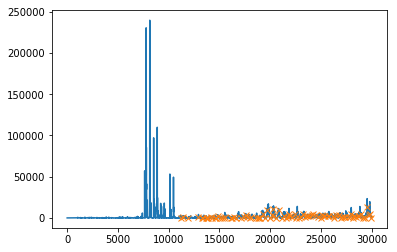

133

In [48]:
peaks, _ = find_peaks(x, height=1000, distance=100)
peaks = peaks + 6000
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()
len(peaks)

In [49]:
test_df.loc[peaks].nlargest(10,'Y(Counts)')

KeyError: "None of [Int64Index([11207, 11466, 11950, 12927, 13281, 13411, 13637, 13786, 13898,\n            14140,\n            ...\n            34496, 34605, 34730, 34851, 34980, 35187, 35432, 35570, 35691,\n            35822],\n           dtype='int64', length=133)] are in the [index]"

In [50]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 25125-50) & (sample_df['X(Daltons)'] <= 25125+100)]

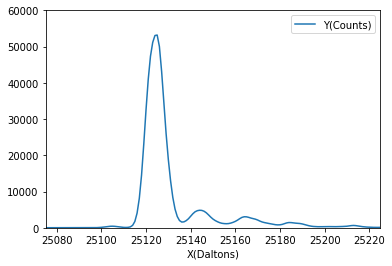

In [51]:
test_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',ylim=(0,60000))

In [52]:
unlabelled_peak_area = test_df['Y(Counts)'].sum()

In [53]:
labelled_df = sample_df[(sample_df['X(Daltons)'] >= 25479-50) & (sample_df['X(Daltons)'] <= 25479+100)]

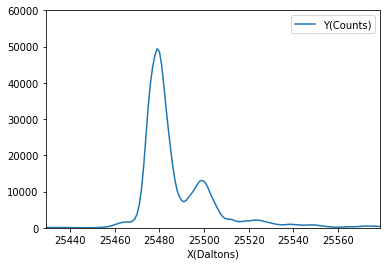

In [54]:
labelled_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',ylim=(0,60000))

In [55]:
labelled_peak_area = labelled_df['Y(Counts)'].sum()

In [56]:
unlabelled_peak_area/ (unlabelled_peak_area + labelled_peak_area)

0.45418843012159876

In [57]:
labelled_peak_area/ (unlabelled_peak_area + labelled_peak_area)

0.5458115698784013

In [58]:
labelled_peak_height = labelled_df['Y(Counts)'].max()

In [59]:
unlabelled_df = test_df
unlabelled_peak_height = unlabelled_df['Y(Counts)'].max()

In [60]:
labelled_peak_height/(unlabelled_peak_height + labelled_peak_height)

0.4814955554238847

In [61]:
unlabelled_peak_height/(unlabelled_peak_height + labelled_peak_height)

0.5185044445761153

In [62]:
def peak_height_outside_of_interest(df, min_interest = 22000, max_interest = 26000):
    """ Find ratio between largest peak inside area of interst, and outside """
    
    peaks, _ = find_peaks(df['Y(Counts)'], height=1000, distance=100)
    
    peaks_df = df.loc[peaks]
    
    interest_peaks_df = peaks_df[(peaks_df['X(Daltons)'] >= min_interest) & (peaks_df['X(Daltons)'] <= max_interest)]
    uninterest_peaks_df = peaks_df[(peaks_df['X(Daltons)'] < min_interest) | (peaks_df['X(Daltons)'] > max_interest)]
    
    max_uninterest_peak = uninterest_peaks_df.nlargest(1,'Y(Counts)')
    max_interest_peak = interest_peaks_df.nlargest(1,'Y(Counts)')
    
    ratio_of_peak_outside_area = max_uninterest_peak['Y(Counts)'].values/(max_interest_peak['Y(Counts)'].values + max_uninterest_peak['Y(Counts)'].values)

    return float(ratio_of_peak_outside_area)

peak_height_outside_of_interest(sample_df)

0.08895218335800459

In [63]:
expected_unlabelled_peaks = np.array([25125, 24218, 23525, 22786])
expected_labelled_peaks = expected_unlabelled_peaks + 354


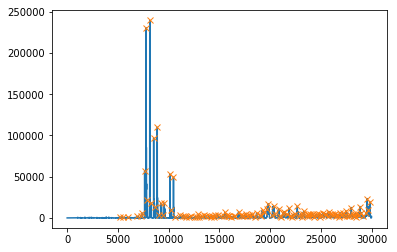

In [64]:
x = sample_df['Y(Counts)']
peaks, _ = find_peaks(x, height=1000, distance=100)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

In [65]:
for key, df in df_dict.items():
     if "190227 : \"+ESI Scan (rt: 7.200-7.994 min, 49 scans) Frag=250.0V blank01.d" in key:
            df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',ylim=(0,2000))

In [66]:
expected_unlabelled_peaks = np.array([25125, 24218, 23525, 22786])
expected_labelled_peaks = expected_unlabelled_peaks + 354

def peak_nearby(df, peak, delta=10, left_range=50, right_range=100):

    peak_df = df[(df['X(Daltons)'] >= peak-delta)
            & (df['X(Daltons)'] <= peak+delta)]
    #print(peak_df)
    peak_loc = peak_df.loc[peak_df['Y(Counts)'].idxmax()]['X(Daltons)']
    peak_height = peak_df['Y(Counts)'].max()
    peak_area_df = sample_df[(sample_df['X(Daltons)'] >= peak-left_range)
            & (sample_df['X(Daltons)'] <= peak+right_range)]
    peak_area = peak_area_df['Y(Counts)'].sum()

    return peak_loc, peak_height, peak_area


x = sample_df['Y(Counts)']
peaks, _ = find_peaks(x, height=1000, distance=100)
peaks_df = df.loc[peaks]

for peak, peak_labelled in zip(expected_unlabelled_peaks, expected_labelled_peaks):

    print(peak, peak_labelled)
    
    peak_loc, peak_height, peak_area = peak_nearby(sample_df, peak, 
                                                   delta=10, 
                                                   left_range=50, 
                                                   right_range=100)
    
    labelled_peak_loc, \
    labelled_peak_height,\
    labelled_peak_area = peak_nearby(df,
                                     peak_labelled, 
                                     delta=10,
                                     left_range=50,right_range=100)

    print(peak_loc,labelled_peak_loc)

    



25125 25479
25125.0 25479.0
24218 24572
24218.0 24582.0
23525 23879
23525.0 23879.0
22786 23140
22786.0 23133.0


/dls/science/groups/i04-1/elliot-dev/envs/parse_xchemdb/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


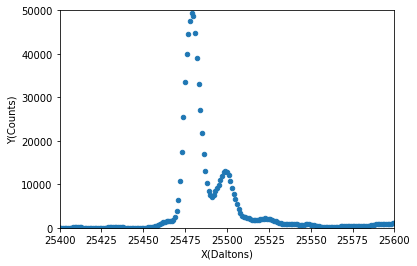

In [67]:
    sample_key = '190301 : "+ESI Scan (rt: 7.203-7.997 min, 49 scans)' \
                 ' Frag=250.0V NUDT7A_p026_CI074435_F5a.d' \
                 '  Deconvoluted (Isotope Width=0.0)"\n'

    sample_df = df_dict[sample_key]

sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='scatter',ylim=(0,50000),xlim=(25400,25600))

Now Looking at plots of ratios. Load in data once:

In [68]:
data_dir = "/dls/science/groups/i04-1/elliot-dev/mass_spec_ratio/NUDT7_Data"
# Parse all csv in folder to separate into individual deconvolutions by headers
df_dict = {}
for csv in os.listdir(data_dir):
    csv = os.path.join(data_dir, csv)
    df_dict.update(read_grouped_csv(csv))

# Remove blank datasets
df_dict = remove_dataset_by_filename_content(df_dict, key_string="blank")
# Remove un-needed dataset
df_dict = remove_dataset_by_filename_content(df_dict,
                                             key_string="NUDT7A_p026_NU0000308a"
                                                        "_post_gel_filtration")

# remove datasets that do not pass signal threshold
# currently 1000 counts in interest area 22000-26000
# TODO Move parameters up to non hard coded region
df_dict, peak_ratios = check_signal_to_noise(df_dict)

# From Exploratory analysis these pairs of peaks are present
# showing that degradation into three sets of paired peaks
expected_unlabelled_peaks = np.array([25125, 24218, 23525, 22786])
expected_labelled_peaks = expected_unlabelled_peaks + 354

# Translate keys (filenames) into ratios
# Split across two dicitionaries to parse
# intended ratio and expected ratio
intended_ratio_dict = ratios_from_filenames(df_dict)

# Process all deconvolutions to ratios of peaks
ratio_df_list = []
for key, df in df_dict.items():
    ratio_df = get_ratios_of_expected_peaks(df,
                                            expected_unlabelled_peaks,
                                            expected_labelled_peaks)

    # Get weights of contributing peaks based on peak height
    height_weight = (ratio_df['peak_height'] + ratio_df['labelled_peak_height']) \
                    / (ratio_df['labelled_peak_height'].sum() + \
                       ratio_df['peak_height'].sum())

    # Get weights of contributing peaks based on peak area
    area_weight = (ratio_df['peak_area'] + ratio_df['labelled_peak_area']) \
                  / (ratio_df['labelled_peak_area'].sum() + \
                     ratio_df['peak_area'].sum())

    # Get a single weighted ratio using peak heights
    weighted_height_ratio = height_weight * ratio_df['height_ratio']
    weighted_height_ratio = weighted_height_ratio.sum()

    # Get a single weighted ratio using peak areas
    weighted_area_ratio = area_weight * ratio_df['area_ratio']
    weighted_area_ratio = weighted_area_ratio.sum()

    # Store weights and ratios, and key in ratio dataframe
    ratio_df['height_weights'] = height_weight
    ratio_df['area_weights'] = area_weight
    ratio_df['weighted_height_ratio'] = weighted_height_ratio
    ratio_df['weighted_area_ratio'] = weighted_area_ratio
    ratio_df['intended_ratio'] = intended_ratio_dict[key]
    ratio_df['key'] = key

    # For concatenating results
    ratio_df_list.append(ratio_df)

ratio_df = pd.concat(ratio_df_list)

Split into two dataframes

In [69]:
ratio_df['pre_crystal'] = ratio_df['key'].apply(string_contains, match='L_')
pre_crystal_df = ratio_df[ratio_df['pre_crystal'] == True]
post_crystal_df = ratio_df[ratio_df['pre_crystal'] == False]

Plotting

/dls/science/groups/i04-1/elliot-dev/mass_spec_ratio/NUDT7_ratios.py:268: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


[0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.75 0.8  0.9  1.  ]
intended_ratio
0.00    0.003307
0.10    0.042297
0.20    0.308075
0.30    0.290241
0.40    0.616585
0.50    0.551568
0.60    0.719755
0.70    0.827915
0.75    0.842789
0.80    0.924831
0.90    0.946729
1.00    0.958738
Name: weighted_height_ratio, dtype: float64


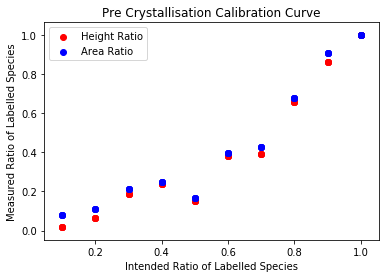

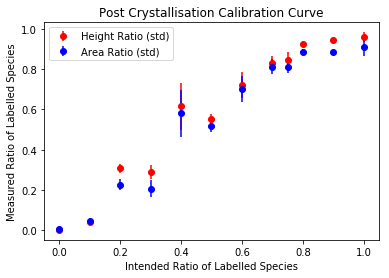

In [70]:
pre_crystal_plot(pre_crystal_df)
post_crystal_plot(post_crystal_df)

Swapping to Calibrated ratio from pre_crystal experiements. Interpolating the missing value, and setting no peak at 0 intedned ratio

In [71]:
df = pre_crystal_df[['intended_ratio','weighted_height_ratio']]
df = df.drop_duplicates()
df = df.sort_values(by=['intended_ratio'])
intended_ratio = df['intended_ratio']
expected_ratio = df['weighted_height_ratio']
interp_val = np.interp(0.75, intended_ratio, expected_ratio)

df1 = pd.DataFrame({'intended_ratio': [0.75,0],
           'weighted_height_ratio': [interp_val,0]})
df = df.append(df1)
df = df.sort_values(by=['intended_ratio'])
df = df.rename(columns={'weighted_height_ratio': 'calibrated_ratio'})
post_crystal_df = pd.merge(post_crystal_df, df, on='intended_ratio')

/dls/science/groups/i04-1/elliot-dev/mass_spec_ratio/NUDT7_ratios.py:294: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


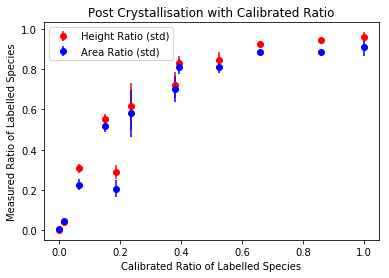

In [72]:
post_crystal_calibrated_plot(post_crystal_df)

In [73]:
for key in df_dict.keys():
    if 'CI074433' in key:
        print(key)
    

190225 : "+ESI Scan (rt: 7.216-7.993 min, 48 scans) Frag=250.0V NUDT7A_p026_CI074433_H1a_multiple_xtal.d  Deconvoluted (Isotope Width=0.0)"

190225 : "+ESI Scan (rt: 7.217-7.995 min, 48 scans) Frag=250.0V NUDT7A_p026_CI074433_H1c_multiple_xtal.d  Deconvoluted (Isotope Width=0.0)"

190302 : "+ESI Scan (rt: 7.208-7.985 min, 48 scans) Frag=250.0V NUDT7A_p026_CI074433_A6d.d  Deconvoluted (Isotope Width=0.0)"

190302 : "+ESI Scan (rt: 7.202-7.996 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074433_B7c.d  Deconvoluted (Isotope Width=0.0)"

190302 : "+ESI Scan (rt: 7.204-7.998 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074433_B9c.d  Deconvoluted (Isotope Width=0.0)"

190302 : "+ESI Scan (rt: 7.202-7.996 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074433_C3c.d  Deconvoluted (Isotope Width=0.0)"

190302 : "+ESI Scan (rt: 7.202-7.996 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074433_C5c.d  Deconvoluted (Isotope Width=0.0)"



In [74]:
key = '190302 : "+ESI Scan (rt: 7.202-7.996 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074433_C5c.d  Deconvoluted (Isotope Width=0.0)"\n'

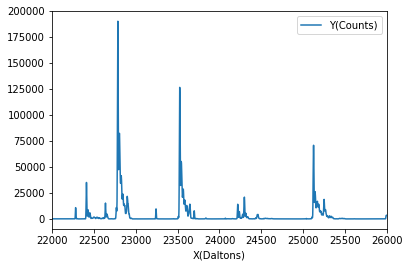

In [75]:
key = '190302 : "+ESI Scan (rt: 7.202-7.996 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074433_C5c.d  Deconvoluted (Isotope Width=0.0)"\n'
no_label_df = df_dict[key]
no_label_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',xlim=(22000,26000))

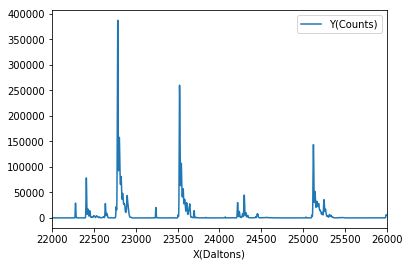

In [76]:
key = '190302 : "+ESI Scan (rt: 7.202-7.996 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074433_C3c.d  Deconvoluted (Isotope Width=0.0)"\n'
no_label_df = df_dict[key]
no_label_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',xlim=(22000,26000))

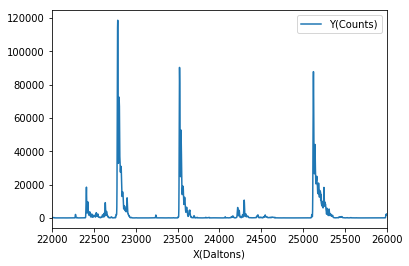

In [77]:
key = '190302 : "+ESI Scan (rt: 7.208-7.985 min, 48 scans) Frag=250.0V NUDT7A_p026_CI074433_A6d.d  Deconvoluted (Isotope Width=0.0)"\n'
no_label_df = df_dict[key]
no_label_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',xlim=(22000,26000))

## Plotting mounted ratios

In [78]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

mounted_df = pd.read_csv('/dls/science/groups/i04-1/elliot-dev/mass_spec_ratio/NUDT7_Data/mounted_ratios.csv')

In [79]:
mounted_df.columns.values

array(['  Mounted Crystal ID ', '  Crystal to be Mounted ',
       'Expected Ratio'], dtype=object)

In [80]:
occ_correct = "/dls/science/groups/i04-1/elliot-dev/Work/NUDT7A_mass_spec_refinements/occ_correct.csv"
occ_correct_df = pd.read_csv(occ_correct)

In [81]:
occ_correct_df

,Unnamed: 0,Unnamed: 0.1,pdb_latest,refine_log,crystal,...,state,comment,converge,occupancy,state occupancy
0,0,0,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2076,...,ground,Correctly Occupied,42.415466,0.273715,0.409117
1,1,1,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2076,...,ground,Correctly Occupied,20.476881,0.135402,0.409117
2,2,2,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2076,...,bound,Correctly Occupied,0.283447,0.406583,0.590883
3,3,3,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2076,...,bound,Correctly Occupied,0.283447,0.406583,0.590883
4,4,4,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2076,...,bound,Correctly Occupied,0.561164,0.184301,0.590883
5,5,5,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2076,...,bound,Correctly Occupied,0.561164,0.184301,0.590883
6,6,6,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2079,...,ground,Correctly Occupied,0.000365,0.479709,0.488800
7,7,7,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2079,...,ground,Correctly Occupied,0.000082,0.009091,0.488800
8,8,8,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2079,...,bound,Correctly Occupied,0.000351,0.502109,0.511200
9,9,9,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2079,...,bound,Correctly Occupied,0.000351,0.502109,0.511200


In [82]:
occ_df = pd.merge(occ_correct_df, mounted_df, right_on='  Mounted Crystal ID ', left_on='crystal')


In [83]:
occ_df = occ_df.drop_duplicates()

In [84]:
occ_df = occ_df[occ_df.state=="bound"]

In [86]:
occ_df = occ_df[occ_df.resname=="LIG"]

In [87]:
occ_df.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'pdb_latest', 'refine_log',
       'crystal', 'occupancy group', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40',
       '41', '42', '43', '44', '45', '46', '47', '48', '49', 'chain',
       'resid', 'alte', 'complete group', 'resname', 'B_mean', 'B_std',
       'state', 'comment', 'converge', 'occupancy', 'state occupancy',
       '  Mounted Crystal ID ', '  Crystal to be Mounted ',
       'Expected Ratio'], dtype=object)

In [88]:
occ_df = occ_df[occ_df['occupancy group']==3]

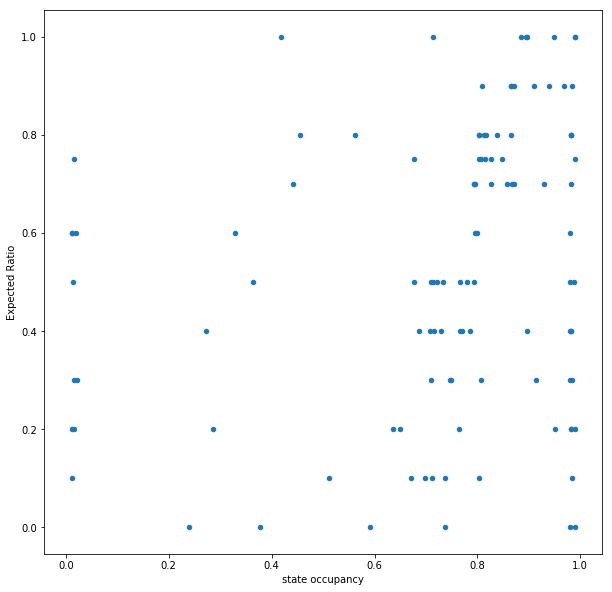

In [89]:
occ_df.plot(x='state occupancy', y='Expected Ratio',kind='scatter')

In [90]:
def xtal_num(row):
    return row.crystal.split('x')[1]

In [91]:
occ_df['xtal_num'] = occ_df.apply(func=xtal_num,axis=1)

Removed older structures in csv file.

In [92]:
occ_new = pd.read_csv("/dls/science/groups/i04-1/elliot-dev/Work/NUDT7A_mass_spec_refinements/occ_quick.csv")

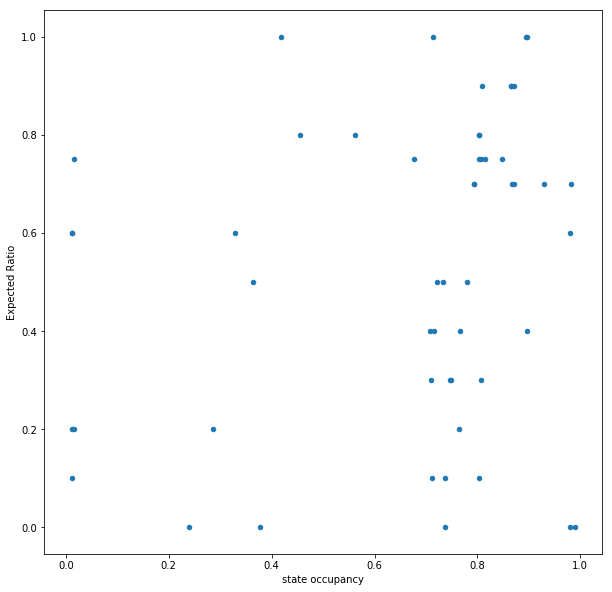

In [93]:
occ_new.plot(x='state occupancy', y='Expected Ratio',kind='scatter')

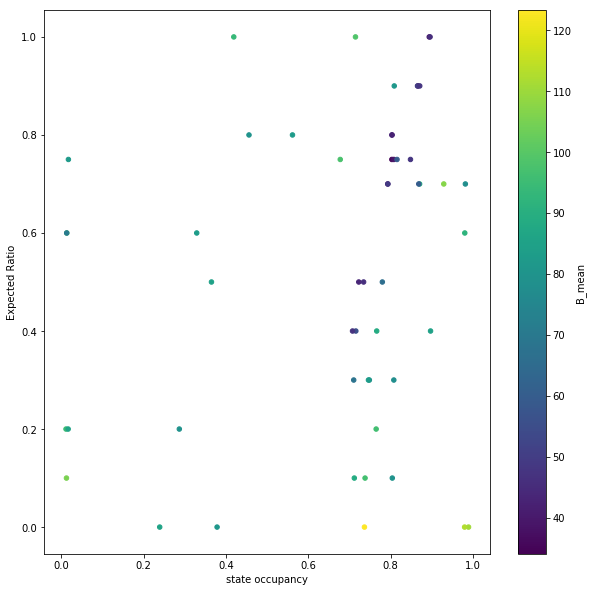

In [94]:
plt.rcParams['figure.figsize'] = [10, 10]
occ_new.plot(x='state occupancy', c='B_mean',kind='scatter',y='Expected Ratio',colormap='viridis', sharex=False)
plt.savefig('occ_B_expected.png')


Looking at the plots for earlier crystals, including all

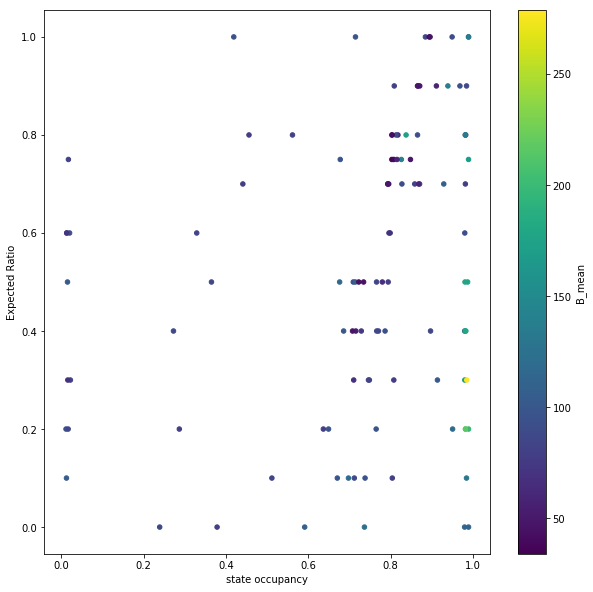

In [95]:
plt.rcParams['figure.figsize'] = [10, 10]
occ_df.plot(x='state occupancy', c='B_mean',kind='scatter',y='Expected Ratio',colormap='viridis', sharex=False)
plt.savefig('occ_B_expected.png')

Plotting with intended ratio

In [96]:
post_crystal_df

,height_ratio,area_ratio,labelled_peak_loc,labelled_peak_height,labelled_peak_area,...,weighted_area_ratio,intended_ratio,key,pre_crystal,calibrated_ratio
0,0.076917,0.069784,25478.0,31665.046875,7.332349e+05,...,0.046979,0.1,"190225 : ""+ESI Scan (rt: 7.216-7.993 min, 48 s...",False,0.017096
1,0.049433,0.039403,24573.0,1937.447998,4.589010e+04,...,0.046979,0.1,"190225 : ""+ESI Scan (rt: 7.216-7.993 min, 48 s...",False,0.017096
2,0.014022,0.005589,23880.0,2839.224121,2.290751e+04,...,0.046979,0.1,"190225 : ""+ESI Scan (rt: 7.216-7.993 min, 48 s...",False,0.017096
3,0.005889,0.028446,23141.0,1078.385010,9.388089e+04,...,0.046979,0.1,"190225 : ""+ESI Scan (rt: 7.216-7.993 min, 48 s...",False,0.017096
4,0.077556,0.071027,25478.0,13837.812500,3.174130e+05,...,0.043490,0.1,"190225 : ""+ESI Scan (rt: 7.217-7.995 min, 48 s...",False,0.017096
5,0.048756,0.048892,24573.0,1225.762939,3.356508e+04,...,0.043490,0.1,"190225 : ""+ESI Scan (rt: 7.217-7.995 min, 48 s...",False,0.017096
6,0.019407,0.009811,23880.0,2873.609131,2.906331e+04,...,0.043490,0.1,"190225 : ""+ESI Scan (rt: 7.217-7.995 min, 48 s...",False,0.017096
7,0.006332,0.031126,23140.0,751.289856,6.796387e+04,...,0.043490,0.1,"190225 : ""+ESI Scan (rt: 7.217-7.995 min, 48 s...",False,0.017096
8,0.994064,0.972424,25479.0,5240.462402,7.954323e+04,...,0.899001,1.0,"190227 : ""+ESI Scan (rt: 7.204-7.998 min, 49 s...",False,0.999785
9,0.661566,0.608145,24574.0,947.406067,4.525719e+04,...,0.899001,1.0,"190227 : ""+ESI Scan (rt: 7.204-7.998 min, 49 s...",False,0.999785


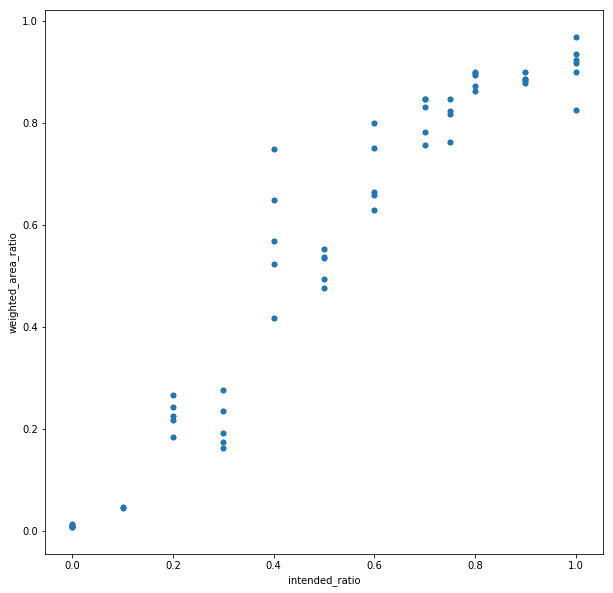

In [97]:
post_crystal_df.plot(x="intended_ratio",y="weighted_area_ratio",kind='scatter')

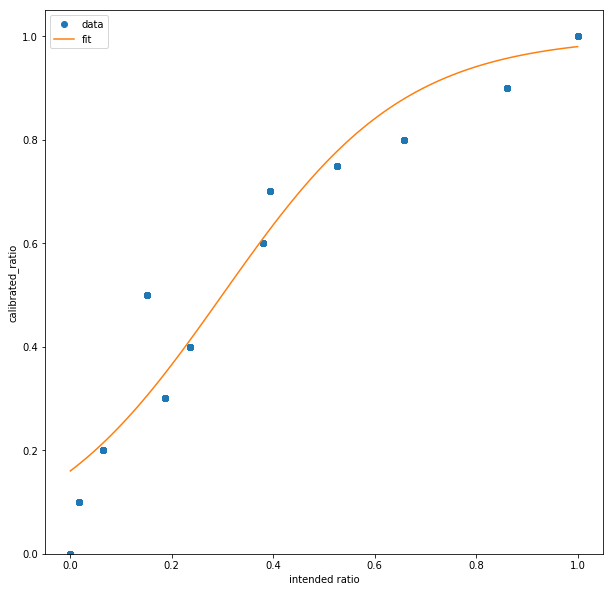

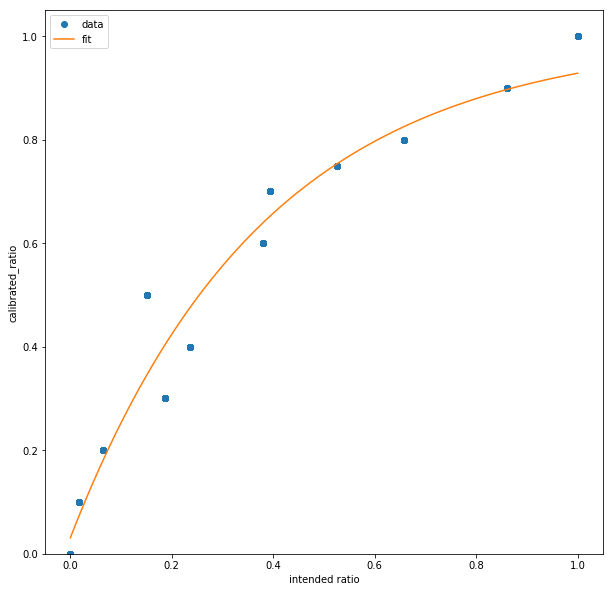

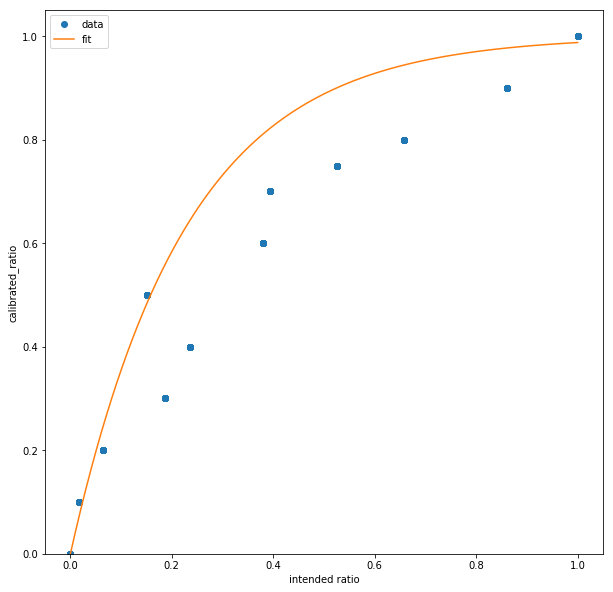

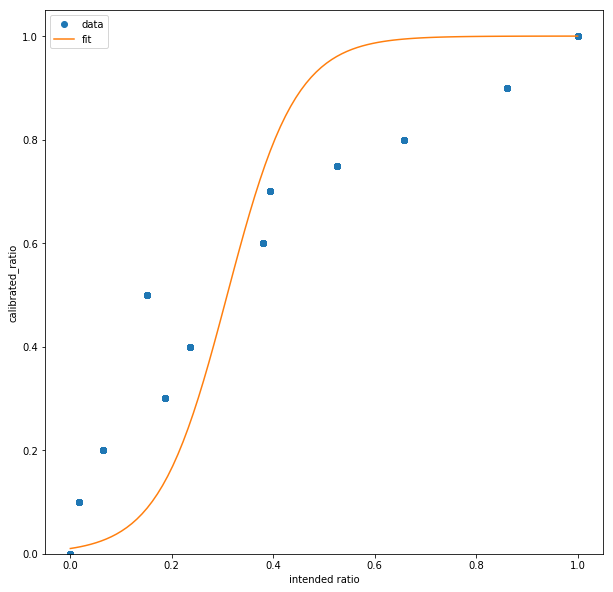

In [98]:
from scipy.optimize import curve_fit


def fsigmoid(x, a, b):
    return 1.0 / (1.0 + np.exp(-a*(x-b)))

def expon(x, a, b):
    return 1 - np.exp(-a*(x-b))

# Sigmoidal fit

popt, pcov = curve_fit(fsigmoid, 
                       ydata = post_crystal_df['intended_ratio'], 
                       xdata = post_crystal_df['calibrated_ratio'], 
                       method='dogbox')

plt.plot(post_crystal_df['calibrated_ratio'], post_crystal_df['intended_ratio'], 'o', label='data')
x = np.linspace(0, 1, 100)
y = fsigmoid(x, *popt)
plt.plot(x,y,label='fit')
plt.ylim(0, 1.05)
plt.legend(loc='best')
plt.xlabel("intended ratio")
plt.ylabel("calibrated_ratio")
plt.show()

# Exponential fit

exp_popt, exp_pcov = curve_fit(expon, 
                       ydata = post_crystal_df['intended_ratio'], 
                       xdata = post_crystal_df['calibrated_ratio'], 
                       method='dogbox')

plt.plot(post_crystal_df['calibrated_ratio'], post_crystal_df['intended_ratio'], 'o', label='data')
x = np.linspace(0, 1, 100)
y = expon(x, *exp_popt)
plt.plot(x,y,label='fit')
plt.ylim(0, 1.05)
plt.legend(loc='best')
plt.xlabel("intended ratio")
plt.ylabel("calibrated_ratio")
plt.show()

# exponential fit forcing end points

sigma = np.ones(len(post_crystal_df['intended_ratio']))
sigma[[0, -1]] = 0.01

popt, pcov = curve_fit(expon, 
                       ydata = sorted(post_crystal_df['intended_ratio']), 
                       xdata = sorted(post_crystal_df['calibrated_ratio']), 
                       method='dogbox',
                       sigma=sigma)

plt.plot(post_crystal_df['calibrated_ratio'], post_crystal_df['intended_ratio'], 'o', label='data')
x = np.linspace(0, 1, 100)
y = expon(x, *popt)
plt.plot(x,y,label='fit')
plt.ylim(0, 1.05)
plt.legend(loc='best')
plt.xlabel("intended ratio")
plt.ylabel("calibrated_ratio")
plt.show()

# sigmoid fit forcing end points

sigma = np.ones(len(post_crystal_df['intended_ratio']))
sigma[[0, -1]] = 0.01

popt, pcov = curve_fit(fsigmoid, 
                       ydata = sorted(post_crystal_df['intended_ratio']), 
                       xdata = sorted(post_crystal_df['calibrated_ratio']), 
                       method='dogbox',
                       sigma=sigma)

plt.plot(post_crystal_df['calibrated_ratio'], post_crystal_df['intended_ratio'], 'o', label='data')
x = np.linspace(0, 1, 100)
y = fsigmoid(x, *popt)
plt.plot(x,y,label='fit')
plt.ylim(0, 1.05)
plt.legend(loc='best')
plt.xlabel("intended ratio")
plt.ylabel("calibrated_ratio")
plt.show()

In [ ]:
x

In [99]:
expon(0, *popt)

-95.88746350861996

In [100]:
expon(0.1,*exp_popt)

0.25302919924816225

In [101]:
occ_new['Calibrated_exp_curve_fit_ratio'] = expon(occ_new['Expected Ratio'], *exp_popt)

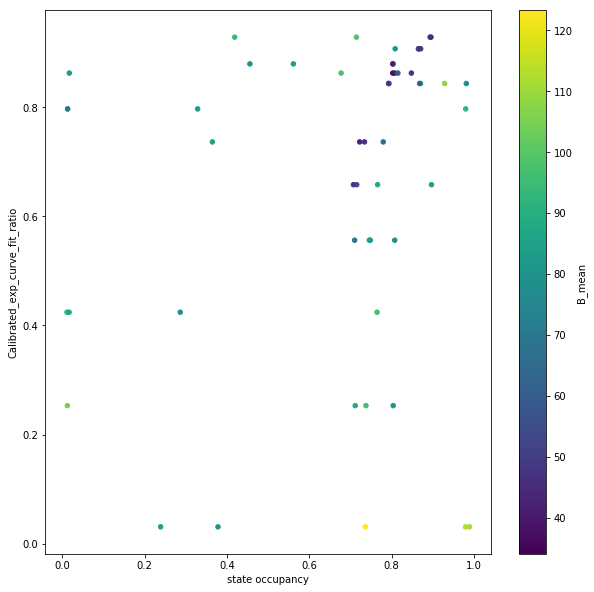

In [102]:
plt.rcParams['figure.figsize'] = [10, 10]
occ_new.plot(x='state occupancy', c='B_mean',kind='scatter',y='Calibrated_exp_curve_fit_ratio',colormap='viridis', sharex=False)
plt.savefig('occ_B_expected_calibrated.png')

## Plotting mounted ratios, from / copy_atoms

In [119]:
occ_correct = "/dls/science/groups/i04-1/elliot-dev/Work/NUDT7A_mass_spec_refinements/copy_atoms/occ_correct.csv"
occ_correct_df = pd.read_csv(occ_correct)

occ_df = pd.merge(occ_correct_df, mounted_df, right_on='  Mounted Crystal ID ', left_on='crystal')
occ_df = occ_df[occ_df.state=="bound"]
occ_df = occ_df[occ_df.resname=="LIG"]
occ_df = occ_df[occ_df['occupancy group']==5]

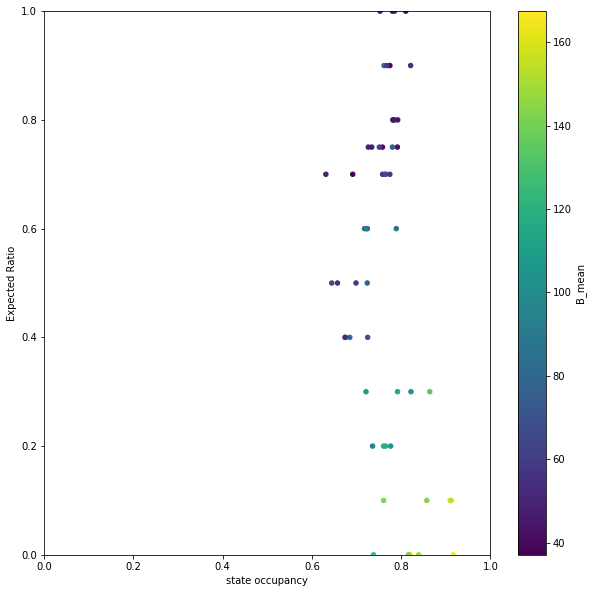

In [130]:
plt.rcParams['figure.figsize'] = [10, 10]
occ_df.plot(x='state occupancy', c='B_mean',kind='scatter',y='Expected Ratio',colormap='viridis', sharex=False)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('copy_atoms_occ_B_expected.png')

In [124]:
occ_df['Calibrated_exp_curve_fit_ratio'] = expon(occ_df['Expected Ratio'], *exp_popt)

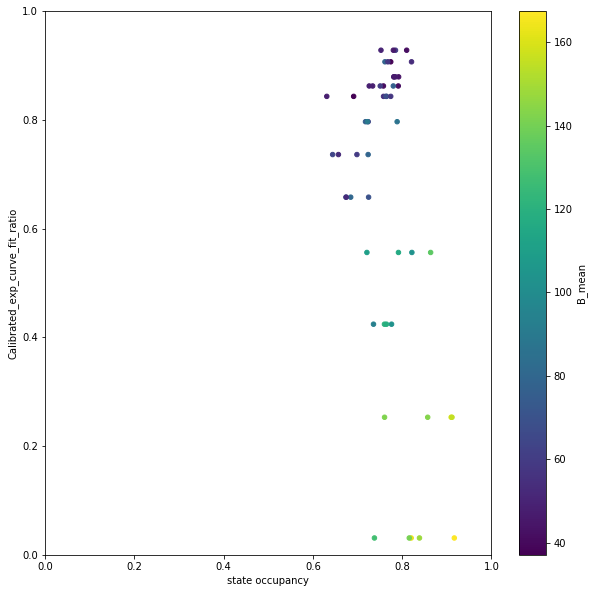

In [129]:
plt.rcParams['figure.figsize'] = [10, 10]
occ_df.plot(x='state occupancy', c='B_mean',kind='scatter',y='Calibrated_exp_curve_fit_ratio',colormap='viridis', sharex=False)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('copy_atoms_occ_B_calibrated.png')

In [123]:
occ_df

,Unnamed: 0,Unnamed: 0.1,pdb_latest,refine_log,crystal,...,state occupancy,Mounted Crystal ID,Crystal to be Mounted,Expected Ratio,Calibrated_exp_curve_fit_ratio
5,5,5,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2160,...,0.631274,NUDT7A-x2160,CI074434-E02a,0.70,0.030939
13,13,13,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2161,...,0.691464,NUDT7A-x2161,CI074434-E02a,0.70,0.424221
21,21,21,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2162,...,0.820332,NUDT7A-x2162,CI074433-A08c,0.00,0.928241
29,29,29,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2175,...,0.758185,NUDT7A-x2175,CI074437-G07c,0.75,0.796734
37,37,37,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2177,...,0.791454,NUDT7A-x2177,CI074437-G07c,0.75,0.879227
45,45,45,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2185,...,0.738021,NUDT7A-x2185,CI074433-C09a,0.00,0.736298
53,53,53,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2186,...,0.816046,NUDT7A-x2186,CI074433-C10a,0.00,NaN
61,61,61,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2187,...,0.916957,NUDT7A-x2187,CI074433-C11c,0.00,NaN
69,69,69,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2188,...,0.857350,NUDT7A-x2188,CI074433-E10c,0.10,NaN
77,77,77,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,/dls/science/groups/i04-1/elliot-dev/Work/NUDT...,NUDT7A-x2189,...,0.909880,NUDT7A-x2189,CI074433-F03a,0.10,NaN
